In [ ]:
pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=290bb19d96aeaddb07e3c5d50e8310476785976aae0a8b92200ca837fb03ff05
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling ch

In [ ]:
#pip install fuzzywuzzy

# Carga de Librerias y Dataset de comentarios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#PASO 1. LEER LA BASE DE DATOS
PP = pd.read_csv('/content/drive/MyDrive/Datas/ADHD-comment.csv')
PP.head()
display(PP)


,body,id,score,created_utc,created_datetime
0,[deleted],c08otkh,1.0,1.239042e+09,2009-04-06 18:18:07
1,If I try to look this up right now I will get ...,c09y8qz,2.0,1.243790e+09,2009-05-31 17:08:19
2,potassium is used as the thing that stops your...,c09yia6,2.0,1.243815e+09,2009-06-01 00:07:50
3,I've love a link to anything about this. \n\n...,c0a81e6,3.0,1.244752e+09,2009-06-11 20:25:36
4,"I don't know anything specific, but I would *d...",c0aixrg,2.0,1.245813e+09,2009-06-24 03:04:51
...,...,...,...,...,...
3356536,&gt;They can’t see how my brain shuts itself d...,gwug5t9,1.0,1.620085e+09,2021-05-03 23:44:24
3356537,"First, congrats, second, you got this!\n\nSo r...",gwug6h0,1.0,1.620085e+09,2021-05-03 23:44:33
3356538,I'm completely the same. I absolutely hate wri...,gwug7do,1.0,1.620085e+09,2021-05-03 23:44:45
3356539,THANK YOU THANK YOU I HAVE SEVERE ADHD TOO AND...,gwug9ko,2.0,1.620086e+09,2021-05-03 23:45:14


# Prepocesamiento de Dataset comentarios

Se observa que hay datos duplicados

In [ ]:
PP_SD = PP.drop_duplicates(['id'])
display(PP_SD)

,body,id,score,created_utc,created_datetime
0,[deleted],c08otkh,1.0,1.239042e+09,2009-04-06 18:18:07
1,If I try to look this up right now I will get ...,c09y8qz,2.0,1.243790e+09,2009-05-31 17:08:19
2,potassium is used as the thing that stops your...,c09yia6,2.0,1.243815e+09,2009-06-01 00:07:50
3,I've love a link to anything about this. \n\n...,c0a81e6,3.0,1.244752e+09,2009-06-11 20:25:36
4,"I don't know anything specific, but I would *d...",c0aixrg,2.0,1.245813e+09,2009-06-24 03:04:51
...,...,...,...,...,...
3356535,"I completely agree, but it also makes me reall...",gwug5et,1.0,1.620085e+09,2021-05-03 23:44:19
3356536,&gt;They can’t see how my brain shuts itself d...,gwug5t9,1.0,1.620085e+09,2021-05-03 23:44:24
3356537,"First, congrats, second, you got this!\n\nSo r...",gwug6h0,1.0,1.620085e+09,2021-05-03 23:44:33
3356538,I'm completely the same. I absolutely hate wri...,gwug7do,1.0,1.620085e+09,2021-05-03 23:44:45


Se eliminan los de etiqueta deleted

In [ ]:
PP_SDE = PP_SD[PP_SD['body'] == '[deleted]'].index.to_list()
dfADHD = PP_SD.drop(index=(PP_SDE))

display(dfADHD)

,body,id,score,created_utc,created_datetime
1,If I try to look this up right now I will get ...,c09y8qz,2.0,1.243790e+09,2009-05-31 17:08:19
2,potassium is used as the thing that stops your...,c09yia6,2.0,1.243815e+09,2009-06-01 00:07:50
3,I've love a link to anything about this. \n\n...,c0a81e6,3.0,1.244752e+09,2009-06-11 20:25:36
4,"I don't know anything specific, but I would *d...",c0aixrg,2.0,1.245813e+09,2009-06-24 03:04:51
5,"Despite continued controversy, powerful new ev...",c0fjlvp,1.0,1.257783e+09,2009-11-09 16:12:44
...,...,...,...,...,...
3356535,"I completely agree, but it also makes me reall...",gwug5et,1.0,1.620085e+09,2021-05-03 23:44:19
3356536,&gt;They can’t see how my brain shuts itself d...,gwug5t9,1.0,1.620085e+09,2021-05-03 23:44:24
3356537,"First, congrats, second, you got this!\n\nSo r...",gwug6h0,1.0,1.620085e+09,2021-05-03 23:44:33
3356538,I'm completely the same. I absolutely hate wri...,gwug7do,1.0,1.620085e+09,2021-05-03 23:44:45


eliminamos columnas que no sirven para el analisis

In [ ]:
dataset = dfADHD.drop(['id','created_utc','score'], axis =1)
dataset.head()

,body,created_datetime
1,If I try to look this up right now I will get ...,2009-05-31 17:08:19
2,potassium is used as the thing that stops your...,2009-06-01 00:07:50
3,I've love a link to anything about this. \n\n...,2009-06-11 20:25:36
4,"I don't know anything specific, but I would *d...",2009-06-24 03:04:51
5,"Despite continued controversy, powerful new ev...",2009-11-09 16:12:44


Se crean columnas de Year y Month

In [ ]:
from datetime import datetime
ss=pd.to_datetime(dataset.created_datetime)
dataset['Year'] = pd.to_datetime(dataset.created_datetime)
dataset['Year'] = dataset['Year'].dt.year
dataset['Month'] = pd.to_datetime(dataset.created_datetime)
dataset['Month'] = dataset['Month'].dt.month
dataset.head()


,body,created_datetime,Year,Month
1,If I try to look this up right now I will get ...,2009-05-31 17:08:19,2009,5
2,potassium is used as the thing that stops your...,2009-06-01 00:07:50,2009,6
3,I've love a link to anything about this. \n\n...,2009-06-11 20:25:36,2009,6
4,"I don't know anything specific, but I would *d...",2009-06-24 03:04:51,2009,6
5,"Despite continued controversy, powerful new ev...",2009-11-09 16:12:44,2009,11


Tomar una muestra aleatoria del 10%

In [ ]:
dataset = dataset.sample(n=60000)  # Obtener una muestra aleatoria de 50000 filas
len(dataset)

60000

Limpeza de caracteres especiales

In [ ]:
import re

# Define a function to clean the text
def clean(body):
    # Removes all special characters and numericals leaving the alphabets
    body = re.sub('[^A-Za-z]+', ' ', body)
    return body

# Cleaning the text in the review column
dataset['Cleaned Body'] = dataset['body'].apply(clean)
dataset.head()

,body,created_datetime,Year,Month,Cleaned Body
120425,ANY.DO and Google Calender and for Finance Min...,2013-05-24 19:36:15,2013,5,ANY DO and Google Calender and for Finance Min...
1702377,it's really hard !! \n\ni was supposed to be s...,2018-12-01 20:30:36,2018,12,it s really hard i was supposed to be studying...
2978313,[I made a post right before I saw this.](https...,2020-11-19 17:29:51,2020,11,I made a post right before I saw this https w...
2920014,Which medicine are you on? \nI haven’t found t...,2020-10-24 04:17:33,2020,10,Which medicine are you on I haven t found the ...
1362543,I had to hyperfocus when I had my IQ test with...,2018-02-14 14:49:07,2018,2,I had to hyperfocus when I had my IQ test with...


# Trabajar con el dataset para medicamentos ADHD

In [ ]:
drugsdt = pd.read_excel('/content/drive/MyDrive/Datas/DRUGS+DATASET+ADHD.xlsx')
drugsdt.head()
display(drugsdt)

,ID,drugName,condition,review,rating,date,usefulCount
0,13407,Amphetamine / dextroamphetamine,ADHD,"""Yes, this medication does work wonders, at fi...",2,"May 20, 2015",57
1,41991,Clonidine,ADHD,"""My 5 year old son was diagnosed with ADHD jus...",10,"April 30, 2011",159
2,225793,Bupropion,ADHD,"""I&#039;ve been on Wellbutrin for over a year ...",10,"June 15, 2011",224
3,37351,Vyvanse,ADHD,"""56 yrs old. Tried Ritilin 15 years ago but st...",8,"July 6, 2015",36
4,37359,Vyvanse,ADHD,"""I had my college finals coming up and I could...",8,"May 1, 2015",28
...,...,...,...,...,...,...,...
1121,88305,Adderall,ADHD,"""I was first diagnosed with ADHD at the age of...",8,"June 22, 2016",65
1122,37591,Vyvanse,ADHD,"""Just started taking Vyvanse. Before I was tak...",10,"September 12, 2010",23
1123,191856,Lisdexamfetamine,ADHD,"""I&#039;m 51-years old and was skeptical regar...",10,"August 27, 2009",129
1124,191724,Lisdexamfetamine,ADHD,"""I&#039;m a 22 year old male with a horrible c...",9,"February 11, 2012",13


In [ ]:
drugsdt = drugsdt.drop_duplicates(['drugName'])
drugsdt.head()


,ID,drugName,condition,review,rating,date,usefulCount
0,13407,Amphetamine / dextroamphetamine,ADHD,"""Yes, this medication does work wonders, at fi...",2,"May 20, 2015",57
1,41991,Clonidine,ADHD,"""My 5 year old son was diagnosed with ADHD jus...",10,"April 30, 2011",159
2,225793,Bupropion,ADHD,"""I&#039;ve been on Wellbutrin for over a year ...",10,"June 15, 2011",224
3,37351,Vyvanse,ADHD,"""56 yrs old. Tried Ritilin 15 years ago but st...",8,"July 6, 2015",36
6,105981,Atomoxetine,ADHD,"""This drug does help me calm down and focus (i...",4,"April 28, 2015",19


In [ ]:
# Cleaning the text in the review column
drugsdt['drugNameC'] = drugsdt['drugName'].apply(clean)
drugsdt.head()

,ID,drugName,condition,review,rating,date,usefulCount,drugNameC
0,13407,Amphetamine / dextroamphetamine,ADHD,"""Yes, this medication does work wonders, at fi...",2,"May 20, 2015",57,Amphetamine dextroamphetamine
1,41991,Clonidine,ADHD,"""My 5 year old son was diagnosed with ADHD jus...",10,"April 30, 2011",159,Clonidine
2,225793,Bupropion,ADHD,"""I&#039;ve been on Wellbutrin for over a year ...",10,"June 15, 2011",224,Bupropion
3,37351,Vyvanse,ADHD,"""56 yrs old. Tried Ritilin 15 years ago but st...",8,"July 6, 2015",36,Vyvanse
6,105981,Atomoxetine,ADHD,"""This drug does help me calm down and focus (i...",4,"April 28, 2015",19,Atomoxetine


In [ ]:
drugsdataset = drugsdt.drop(['ID','drugName','condition', 'review', 'rating', 'date', 'usefulCount'], axis =1)
drugsdataset= np.array(drugsdataset)
print(drugsdataset)

[['Amphetamine dextroamphetamine']
 ['Clonidine']
 ['Bupropion']
 ['Vyvanse']
 ['Atomoxetine']
 ['Dexmethylphenidate']
 ['Adderall']
 ['Aptensio XR']
 ['Intuniv']
 ['Lisdexamfetamine']
 ['Focalin XR']
 ['Strattera']
 ['Mydayis']
 ['Concerta']
 ['Guanfacine']
 ['Ritalin']
 ['Amphetamine']
 ['Methylphenidate']
 ['Dextroamphetamine']
 ['Adzenys XR ODT']
 ['Adderall XR']
 ['Daytrana']
 ['Methylin']
 ['Focalin']
 ['Omega polyunsaturated fatty acids']
 ['Ritalin SR']
 ['Dexedrine']
 ['Metadate ER']
 ['Metadate CD']
 ['Wellbutrin XL']
 ['Armodafinil']
 ['Evekeo']
 ['Kapvay']
 ['Pristiq']
 ['Dyanavel XR']
 ['Budeprion XL']
 ['Quillivant XR']
 ['Methamphetamine']
 ['Desoxyn']
 ['Desvenlafaxine']
 ['Ritalin LA']
 ['Dextrostat']
 ['Cylert']
 ['Modafinil']
 ['Provigil']
 ['Nuvigil']
 ['Methylin ER']
 ['Pemoline']]


Funcion para verificar si existe la palabra en una cadena

In [ ]:
#funcion para encontrar palabras
from fuzzywuzzy import fuzz

def existe_palabra(texto, palabra_buscada, umbral):
    e = 0
    palabras = texto.split()
    for palabra in palabras:
        similitud = fuzz.ratio(palabra_buscada, palabra)
        if similitud >= umbral:
          e=1
    return e


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


arreglo de los medicamentos

In [ ]:
#creamos el arreglo que validara los medicamentos en los comentarios
arreglodrugs = []
existe = 0
cadena = ''
# Iterar sobre los índices del arreglo utilizando un bucle for
for i in range(len(drugsdataset)):
    elemento = str(drugsdataset[i])
    elementof = np.array(elemento.split())
    #arreglo = np.array(elementof)
    for j in range(len(elementof)):
      arreglo = []
      palabra = str(elementof[j])
      palabra= palabra.replace(" ","")
      palabra= palabra.replace("[","")
      palabra= palabra.replace("]","")
      palabra= palabra.replace("'","")
      #para no guardar formatos de duracion prolongada etc.
      if len(palabra)>=3:
        cadena = ', '.join(str(elemento) for elemento in arreglodrugs)
        existe = existe_palabra(cadena, palabra, 80)
        #existe es para no repetir el medicamento en el arreglo.
        if existe==1:
          arreglo = []
        if existe==0:
          arreglo.append(palabra)
          arreglodrugs += arreglo
print(arreglodrugs)

['Amphetamine', 'dextroamphetamine', 'Clonidine', 'Bupropion', 'Vyvanse', 'Atomoxetine', 'Dexmethylphenidate', 'Adderall', 'Aptensio', 'Intuniv', 'Lisdexamfetamine', 'Focalin', 'Strattera', 'Mydayis', 'Concerta', 'Guanfacine', 'Ritalin', 'Adzenys', 'ODT', 'Daytrana', 'Methylin', 'Omega', 'polyunsaturated', 'fatty', 'acids', 'Dexedrine', 'Metadate', 'Wellbutrin', 'Armodafinil', 'Evekeo', 'Kapvay', 'Pristiq', 'Dyanavel', 'Budeprion', 'Quillivant', 'Methamphetamine', 'Desoxyn', 'Desvenlafaxine', 'Dextrostat', 'Cylert', 'Modafinil', 'Provigil', 'Nuvigil', 'Pemoline']


In [ ]:
existe = 0
j=0
#dataset.head()
for indice, registro in dataset.iterrows():
  j+=1
  cadena = registro['Cleaned Body']
  for i in range(len(arreglodrugs)):
    palabra = str(arreglodrugs[i])
    existe = existe_palabra(cadena, palabra, 80)
    if existe ==1:
      dataset.loc[indice, 'Tipo'] = 'Medicación'
      dataset.loc[indice, 'Medicación'] = palabra
      print(j)
      break


Se han truncado las últimas 5000 líneas del flujo de salida.
4033
4043
4044
4046
4059
4074
4079
4108
4120
4129
4146
4151
4154
4170
4173
4182
4185
4188
4204
4220
4221
4235
4243
4263
4267
4272
4280
4286
4299
4326
4356
4380
4401
4407
4443
4484
4488
4500
4502
4511
4515
4526
4532
4535
4550
4556
4561
4562
4563
4564
4569
4570
4572
4583
4612
4618
4638
4643
4658
4670
4673
4677
4686
4696
4703
4706
4708
4723
4728
4763
4764
4766
4771
4773
4788
4789
4793
4804
4819
4826
4842
4863
4872
4894
4904
4906
4931
4932
4935
4956
4967
4968
4972
4985
5013
5032
5043
5045
5085
5106
5121
5125
5141
5142
5145
5146
5172
5176
5180
5191
5194
5196
5201
5207
5220
5226
5239
5242
5255
5264
5266
5268
5277
5290
5296
5314
5331
5337
5338
5344
5350
5370
5383
5395
5401
5437
5448
5450
5463
5477
5481
5483
5504
5522
5536
5584
5616
5627
5636
5644
5659
5695
5710
5714
5715
5718
5756
5770
5774
5775
5776
5789
5797
5802
5824
5838
5842
5859
5864
5873
5910
5923
5943
5963
5981
5983
5990
6026
6029
6040
6051
6060
6066
6094
6098
6114
6131
6149

In [ ]:
PP_SDE = dataset[dataset['Tipo'] != 'Medicación'].index.to_list()
datasetbckup = dataset.drop(index=(PP_SDE))
datasetbckup = datasetbckup.reset_index(drop=True)
display(datasetbckup)

,body,created_datetime,Year,Month,Cleaned Body,Tipo,Medicación
0,I gave up on adderall and switched to Metadate...,2015-11-05 22:38:11,2015,11,I gave up on adderall and switched to Metadate...,Medicación,Adderall
1,I find it works better for me to take my adder...,2016-05-01 11:16:55,2016,5,I find it works better for me to take my adder...,Medicación,Adderall
2,My doctor said it was good when the medication...,2016-02-13 21:41:19,2016,2,My doctor said it was good when the medication...,Medicación,Vyvanse
3,So earlier when I was researching I found seve...,2016-01-26 23:22:27,2016,1,So earlier when I was researching I found seve...,Medicación,Daytrana
4,Is it common that the body gets used to it? My...,2018-10-11 18:49:15,2018,10,Is it common that the body gets used to it My ...,Medicación,Vyvanse
...,...,...,...,...,...,...,...
5349,It was panic attacks that finally made me took...,2015-08-20 14:15:03,2015,8,It was panic attacks that finally made me took...,Medicación,Intuniv
5350,I work in a pharmacy and that’s not true at al...,2020-07-14 03:17:31,2020,7,I work in a pharmacy and that s not true at al...,Medicación,Vyvanse
5351,"I know, I just freak a bit because I know peop...",2017-08-14 02:15:24,2017,8,I know I just freak a bit because I know peopl...,Medicación,Concerta
5352,"I have ADHD-PI, Bipolar I/II/flavor-of-the-mon...",2013-02-18 01:17:07,2013,2,I have ADHD PI Bipolar I II flavor of the mont...,Medicación,Adderall


In [ ]:
# Preprocesamiento y representación de los comentarios como vectores TF-IDF
vectorizer = TfidfVectorizer()
v  = vectorizer.fit_transform(datasetbckup['Cleaned Body'] )

In [ ]:
datasetbckup.loc[5323, ['Cleaned Body']]

Cleaned Body    I do and it s significantly amplified when my ...
Name: 5323, dtype: object

In [ ]:
# Aplicación del algoritmo de K-means
k = 3  # Número de clústeres
kmeans = KMeans(n_clusters=k)
kmeans.fit(v)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# Obtención de las etiquetas de clúster asignadas a cada comentario
cluster_labels = kmeans.labels_

In [ ]:
print(cluster_labels)

[0 1 0 ... 0 1 1]


In [ ]:
for i in range(len(cluster_labels)):
    datasetbckup.loc[i, 'cluster_labels'] = str(cluster_labels[i])
    print(i, cluster_labels[i])
datasetbckup.head()

Se han truncado las últimas 5000 líneas del flujo de salida.
354 1
355 0
356 0
357 0
358 0
359 0
360 1
361 0
362 1
363 1
364 0
365 1
366 0
367 1
368 0
369 0
370 1
371 2
372 0
373 2
374 1
375 0
376 2
377 1
378 1
379 1
380 2
381 0
382 1
383 0
384 0
385 1
386 0
387 2
388 1
389 0
390 0
391 0
392 1
393 0
394 2
395 0
396 1
397 2
398 2
399 2
400 0
401 1
402 0
403 0
404 0
405 0
406 0
407 2
408 2
409 0
410 2
411 1
412 0
413 2
414 1
415 1
416 0
417 0
418 0
419 2
420 0
421 1
422 2
423 1
424 1
425 0
426 0
427 0
428 1
429 0
430 0
431 1
432 1
433 0
434 0
435 0
436 1
437 0
438 0
439 0
440 2
441 2
442 0
443 2
444 1
445 0
446 1
447 1
448 0
449 0
450 1
451 1
452 0
453 0
454 2
455 1
456 1
457 0
458 2
459 0
460 0
461 0
462 0
463 0
464 0
465 1
466 0
467 0
468 2
469 2
470 0
471 0
472 0
473 1
474 0
475 1
476 0
477 0
478 1
479 0
480 1
481 1
482 1
483 1
484 1
485 2
486 0
487 1
488 0
489 1
490 2
491 0
492 1
493 0
494 0
495 0
496 1
497 0
498 1
499 2
500 2
501 2
502 0
503 2
504 2
505 2
506 0
507 1
508 1
509 0
510

,body,created_datetime,Year,Month,Cleaned Body,Tipo,Medicación,cluster_labels
0,I gave up on adderall and switched to Metadate...,2015-11-05 22:38:11,2015,11,I gave up on adderall and switched to Metadate...,Medicación,Adderall,0
1,I find it works better for me to take my adder...,2016-05-01 11:16:55,2016,5,I find it works better for me to take my adder...,Medicación,Adderall,1
2,My doctor said it was good when the medication...,2016-02-13 21:41:19,2016,2,My doctor said it was good when the medication...,Medicación,Vyvanse,0
3,So earlier when I was researching I found seve...,2016-01-26 23:22:27,2016,1,So earlier when I was researching I found seve...,Medicación,Daytrana,0
4,Is it common that the body gets used to it? My...,2018-10-11 18:49:15,2018,10,Is it common that the body gets used to it My ...,Medicación,Vyvanse,1


In [ ]:
datasetbckup.head()

,body,created_datetime,Year,Month,Cleaned Body,Tipo,Medicación,cluster_labels
0,I gave up on adderall and switched to Metadate...,2015-11-05 22:38:11,2015,11,I gave up on adderall and switched to Metadate...,Medicación,Adderall,0
1,I find it works better for me to take my adder...,2016-05-01 11:16:55,2016,5,I find it works better for me to take my adder...,Medicación,Adderall,1
2,My doctor said it was good when the medication...,2016-02-13 21:41:19,2016,2,My doctor said it was good when the medication...,Medicación,Vyvanse,0
3,So earlier when I was researching I found seve...,2016-01-26 23:22:27,2016,1,So earlier when I was researching I found seve...,Medicación,Daytrana,0
4,Is it common that the body gets used to it? My...,2018-10-11 18:49:15,2018,10,Is it common that the body gets used to it My ...,Medicación,Vyvanse,1


In [ ]:


import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}




def token_stop_pos(body):
    tags = pos_tag(word_tokenize(body))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
datasetbckup['POS tagged'] = datasetbckup['Cleaned Body'].apply(token_stop_pos)
datasetbckup['Lemma'] = datasetbckup['POS tagged'].apply(lemmatize)


In [ ]:
datasetbckup[['body', 'Lemma']]

,body,Lemma
0,I gave up on adderall and switched to Metadate...,give adderall switch Metadate CD mg day far ...
1,I find it works better for me to take my adder...,find work well take adderall morning coffee ...
2,My doctor said it was good when the medication...,doctor say good medication wear drink green ...
3,So earlier when I was researching I found seve...,earlier research find several article cite r...
4,Is it common that the body gets used to it? My...,common body get use yr old take mg month not...
...,...,...
5349,It was panic attacks that finally made me took...,panic attack finally make take depression se...
5350,I work in a pharmacy and that’s not true at al...,work pharmacy true Vyvanse brand medication ...
5351,"I know, I just freak a bit because I know peop...",know freak bit know people cut concertas hal...
5352,"I have ADHD-PI, Bipolar I/II/flavor-of-the-mon...",ADHD PI Bipolar II flavor month mostly depre...


In [ ]:
display(datasetbckup)

,body,created_datetime,Year,Month,Cleaned Body,Tipo,Medicación,cluster_labels,POS tagged,Lemma,Vader Sentiment,Vader_Analysis
0,I gave up on adderall and switched to Metadate...,2015-11-05 22:38:11,2015,11,I gave up on adderall and switched to Metadate...,Medicación,Adderall,0,"[(gave, v), (adderall, n), (switched, v), (Met...",give adderall switch Metadate CD mg day far ...,0.4404,Neutral
1,I find it works better for me to take my adder...,2016-05-01 11:16:55,2016,5,I find it works better for me to take my adder...,Medicación,Adderall,1,"[(find, v), (works, v), (better, r), (take, v)...",find work well take adderall morning coffee ...,0.7351,Positive
2,My doctor said it was good when the medication...,2016-02-13 21:41:19,2016,2,My doctor said it was good when the medication...,Medicación,Vyvanse,0,"[(doctor, n), (said, v), (good, a), (medicatio...",doctor say good medication wear drink green ...,0.8689,Positive
3,So earlier when I was researching I found seve...,2016-01-26 23:22:27,2016,1,So earlier when I was researching I found seve...,Medicación,Daytrana,0,"[(earlier, r), (researching, v), (found, v), (...",earlier research find several article cite r...,-0.3612,Neutral
4,Is it common that the body gets used to it? My...,2018-10-11 18:49:15,2018,10,Is it common that the body gets used to it My ...,Medicación,Vyvanse,1,"[(common, a), (body, n), (gets, v), (used, v),...",common body get use yr old take mg month not...,0.5994,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
5349,It was panic attacks that finally made me took...,2015-08-20 14:15:03,2015,8,It was panic attacks that finally made me took...,Medicación,Intuniv,2,"[(panic, a), (attacks, n), (finally, r), (made...",panic attack finally make take depression se...,-0.2382,Neutral
5350,I work in a pharmacy and that’s not true at al...,2020-07-14 03:17:31,2020,7,I work in a pharmacy and that s not true at al...,Medicación,Vyvanse,0,"[(work, v), (pharmacy, n), (true, a), (Vyvanse...",work pharmacy true Vyvanse brand medication ...,0.8957,Positive
5351,"I know, I just freak a bit because I know peop...",2017-08-14 02:15:24,2017,8,I know I just freak a bit because I know peopl...,Medicación,Concerta,0,"[(know, v), (freak, v), (bit, n), (know, v), (...",know freak bit know people cut concertas hal...,-0.5106,Negative
5352,"I have ADHD-PI, Bipolar I/II/flavor-of-the-mon...",2013-02-18 01:17:07,2013,2,I have ADHD PI Bipolar I II flavor of the mont...,Medicación,Adderall,1,"[(ADHD, n), (PI, n), (Bipolar, n), (II, n), (f...",ADHD PI Bipolar II flavor month mostly depre...,0.9522,Positive


VADER

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

datasetbckup['Vader Sentiment'] = datasetbckup['Lemma'].apply(vadersentimentanalysis)


In [ ]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'



In [ ]:
datasetbckup['Vader_Analysis'] = datasetbckup['Vader Sentiment'].apply(vader_analysis)
datasetbckup.head()

,body,created_datetime,Year,Month,Cleaned Body,Tipo,Medicación,cluster_labels,POS tagged,Lemma,Vader Sentiment,Vader_Analysis
0,I gave up on adderall and switched to Metadate...,2015-11-05 22:38:11,2015,11,I gave up on adderall and switched to Metadate...,Medicación,Adderall,0,"[(gave, v), (adderall, n), (switched, v), (Met...",give adderall switch Metadate CD mg day far ...,0.4404,Neutral
1,I find it works better for me to take my adder...,2016-05-01 11:16:55,2016,5,I find it works better for me to take my adder...,Medicación,Adderall,1,"[(find, v), (works, v), (better, r), (take, v)...",find work well take adderall morning coffee ...,0.7351,Positive
2,My doctor said it was good when the medication...,2016-02-13 21:41:19,2016,2,My doctor said it was good when the medication...,Medicación,Vyvanse,0,"[(doctor, n), (said, v), (good, a), (medicatio...",doctor say good medication wear drink green ...,0.8689,Positive
3,So earlier when I was researching I found seve...,2016-01-26 23:22:27,2016,1,So earlier when I was researching I found seve...,Medicación,Daytrana,0,"[(earlier, r), (researching, v), (found, v), (...",earlier research find several article cite r...,-0.3612,Neutral
4,Is it common that the body gets used to it? My...,2018-10-11 18:49:15,2018,10,Is it common that the body gets used to it My ...,Medicación,Vyvanse,1,"[(common, a), (body, n), (gets, v), (used, v),...",common body get use yr old take mg month not...,0.5994,Positive


In [ ]:
vader_counts = datasetbckup.Vader_Analysis.value_counts()
print(vader_counts)

Positive    2468
Neutral     2147
Negative     739
Name: Vader_Analysis, dtype: int64


In [ ]:
# Especifica la ruta y el nombre de archivo para guardar el archivo Excel
nombre_archivo = 'comentariosclustering5.xlsx'

# Guarda el DataFrame en un archivo Excel
datasetbckup.to_excel(nombre_archivo, index=False)

([<matplotlib.patches.Wedge at 0x7fb5d5a35b70>,
 [Text(0.14679457192414566, 1.190987553945719, 'Positive'),
  Text(-0.5808175531541793, -0.934157893478395, 'Neutral'),
  Text(0.9981927405285139, -0.4621809740309257, 'Negative')],
 [Text(0.08563016695575164, 0.6947427398016693, '46.1%'),
  Text(-0.3168095744477341, -0.5095406691700335, '40.1%'),
  Text(0.5444687675610075, -0.2520987131077776, '13.8%')])

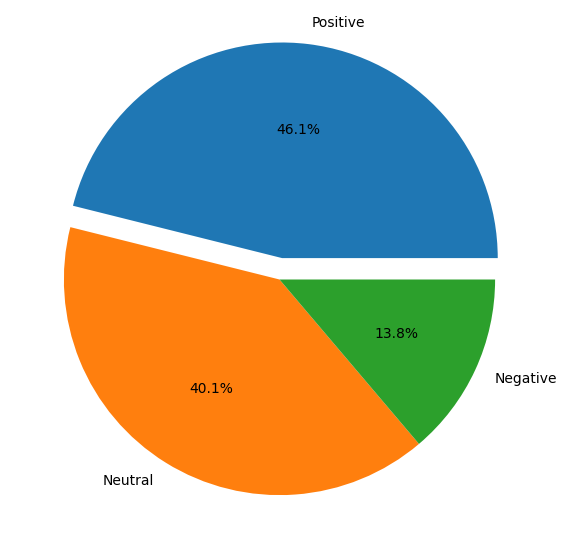

In [ ]:
vader_counts= datasetbckup['Vader_Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)




In [ ]:
datasetbckup.head()

,body,created_datetime,Year,Month,Cleaned Body,Tipo,Medicación,cluster_labels,POS tagged,Lemma,Vader Sentiment,Vader_Analysis
0,I gave up on adderall and switched to Metadate...,2015-11-05 22:38:11,2015,11,I gave up on adderall and switched to Metadate...,Medicación,Adderall,0,"[(gave, v), (adderall, n), (switched, v), (Met...",give adderall switch Metadate CD mg day far ...,0.4404,Neutral
1,I find it works better for me to take my adder...,2016-05-01 11:16:55,2016,5,I find it works better for me to take my adder...,Medicación,Adderall,1,"[(find, v), (works, v), (better, r), (take, v)...",find work well take adderall morning coffee ...,0.7351,Positive
2,My doctor said it was good when the medication...,2016-02-13 21:41:19,2016,2,My doctor said it was good when the medication...,Medicación,Vyvanse,0,"[(doctor, n), (said, v), (good, a), (medicatio...",doctor say good medication wear drink green ...,0.8689,Positive
3,So earlier when I was researching I found seve...,2016-01-26 23:22:27,2016,1,So earlier when I was researching I found seve...,Medicación,Daytrana,0,"[(earlier, r), (researching, v), (found, v), (...",earlier research find several article cite r...,-0.3612,Neutral
4,Is it common that the body gets used to it? My...,2018-10-11 18:49:15,2018,10,Is it common that the body gets used to it My ...,Medicación,Vyvanse,1,"[(common, a), (body, n), (gets, v), (used, v),...",common body get use yr old take mg month not...,0.5994,Positive


([<matplotlib.patches.Wedge at 0x7fb5d5be3730>,
 [Text(0.18690137940461288, 1.0840054770971654, 'Neutral'),
  Text(-0.6824772020390191, -0.86268468671757, 'Positive'),
  Text(1.1856691669476607, -0.6455142341959941, 'Negative')],
 [Text(0.10194620694797064, 0.591275714780272, '44.6%'),
  Text(-0.37226029202128313, -0.4705552836641291, '39.6%'),
  Text(0.746532438448527, -0.4064348881974777, '15.9%')])

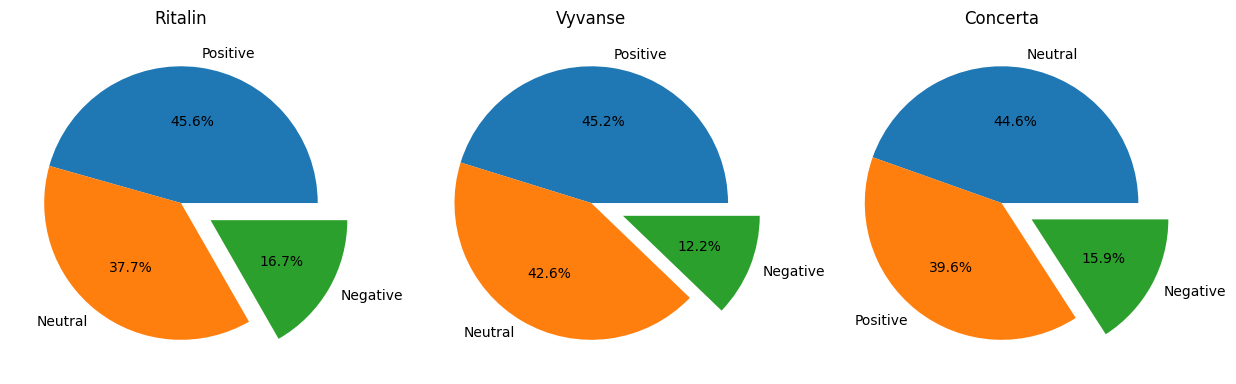

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

datasetRitalin= datasetbckup[datasetbckup['Medicación'] == 'Ritalin']
ritalin_counts = datasetRitalin.Vader_Analysis.value_counts()
datasetVyvanse= datasetbckup[datasetbckup['Medicación'] == 'Vyvanse']
Vyvanse_counts = datasetVyvanse.Vader_Analysis.value_counts()
datasetConcerta= datasetbckup[datasetbckup['Medicación'] == 'Concerta']
Concerta_counts = datasetConcerta.Vader_Analysis.value_counts()
datasetAtomoxetine= datasetbckup[datasetbckup['Medicación'] == 'Atomoxetine']
Atomoxetine_counts = datasetAtomoxetine.Vader_Analysis.value_counts()


plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("Ritalin")
plt.pie(ritalin_counts.values, labels = ritalin_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("Vyvanse")
plt.pie(Vyvanse_counts.values, labels = Vyvanse_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
#plt.title("Atomoxetine")
#plt.pie(Atomoxetine_counts.values, labels = Atomoxetine_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.title("Concerta")
plt.pie(Concerta_counts.values, labels = Concerta_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
#print(Atomoxetine_counts)